In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
def get_datasets():
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    df = pd.concat([brca, ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()

1658 49554


In [3]:
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier 
from math import sqrt
nbrs = KNeighborsClassifier(n_neighbors=int(sqrt(len(y))))
nbrs.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [5]:
# Initial score without any tuning
nbrs.score(X_test,y_test)

0.708029197080292

In [6]:
# https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6

In [7]:
# PCA to reduce dimensions
x = 0.9999
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_pca = pca.transform(X)
pca = PCA(n_components=x)
pca.fit(X_train)
X_pca = pca.transform(X)
print('at', x, '% of the variance ======')
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)
X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)


at 0.9999 % of the variance ======
original shape:    (1658, 24776)
transformed shape: (1658, 997)


In [12]:
df_redd

,0,1,2,3,4,5,6,7,8,9,...,987,988,989,990,991,992,993,994,995,996
0,-1.790231,-9.373232,2.114552,0.790684,14.969523,1.926469,2.764007,-4.663392,-11.982148,8.458127,...,-0.001461,-0.000509,0.012397,-0.001588,-0.004177,-0.012697,0.006360,0.001503,0.006942,0.022418
1,-20.067478,1.136906,2.580673,-9.705372,14.715725,31.293413,28.555443,-9.019573,-7.544973,19.457374,...,-0.016779,0.010461,-0.000134,0.025357,-0.010102,-0.004454,-0.005833,0.003306,-0.008238,-0.016270
2,-15.232300,2.131580,17.209687,-0.748946,14.486671,10.228378,6.045745,-14.638316,-5.442889,5.225614,...,-0.001729,0.018474,0.011942,-0.005422,-0.004211,0.000204,-0.013832,-0.003325,0.012034,-0.007037
3,-22.026543,-10.290559,-5.471568,-3.647886,-4.992222,17.206146,21.163643,2.423320,-10.254373,0.788743,...,-0.001265,0.029363,-0.013187,-0.022293,-0.003614,-0.023411,-0.056139,-0.027434,-0.015651,0.006570
4,-6.987871,-8.546274,13.993947,-15.789931,-0.216049,-8.976633,11.738501,2.749087,-6.210674,-10.788096,...,-0.007936,-0.001128,0.024154,-0.059566,-0.051207,0.120207,-0.161757,0.069329,-0.017983,-0.027489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,28.724722,37.654531,-1.501349,13.767667,-8.379604,9.903506,-27.850821,10.478333,12.236161,22.556819,...,0.006267,-0.086378,-0.167772,0.011436,0.052565,0.046370,0.012952,-0.072832,0.116887,-0.064631
1654,36.223216,6.751795,-19.854170,5.819443,16.068819,0.133543,-2.553254,14.290910,-31.751576,-23.974304,...,0.032582,-0.023569,-0.044742,0.022019,0.000330,-0.053248,0.012123,-0.012220,0.024081,0.051751
1655,46.188260,0.577531,-15.842699,-3.009699,5.246139,6.733427,-16.487168,-9.865316,-4.341753,-5.410388,...,-0.022430,0.031891,-0.042140,0.011927,-0.003484,-0.000362,0.015204,-0.056675,-0.019811,-0.011728
1656,38.266788,8.610648,15.145638,7.613132,-3.919411,-14.259415,5.452016,19.827105,11.012455,-14.090400,...,0.003070,-0.009750,0.000369,-0.008479,-0.017785,-0.006839,0.010538,0.003463,-0.009685,0.001146


In [13]:
# search for an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
# Loop through reasonable values of k
for k in k_range:
    print("On", k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,df_redd,y_red,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

On 1
On 2
On 3
On 4
On 5
On 6
On 7
On 8
On 9
On 10
On 11
On 12
On 13
On 14
On 15
On 16
On 17
On 18
On 19
On 20
On 21
On 22
On 23
On 24
On 25
On 26
On 27
On 28
On 29
On 30
On 31
On 32
On 33
On 34
On 35
On 36
On 37
On 38
On 39
On 40
On 41
On 42
On 43
On 44
On 45
On 46
On 47
On 48
On 49
On 50
On 51
On 52
On 53
On 54
On 55
On 56
On 57
On 58
On 59
On 60
On 61
On 62
On 63
On 64
On 65
On 66
On 67
On 68
On 69
On 70
On 71
On 72
On 73
On 74
On 75
On 76
On 77
On 78
On 79
On 80
On 81
On 82
On 83
On 84
On 85
On 86
On 87
On 88
On 89
On 90
On 91
On 92
On 93
On 94
On 95
On 96
On 97
On 98
On 99
[0.8498138006571742, 0.8799707922599488, 0.8263052208835342, 0.8510514786418402, 0.8112340270171595, 0.827524644030668, 0.7985578678349763, 0.8094231471339904, 0.7858999634903249, 0.7961555312157722, 0.776246805403432, 0.7840890836071559, 0.7665936473165388, 0.7738408178167215, 0.7581599123767797, 0.7666082511865645, 0.7515261044176708, 0.7581672143117927, 0.7448922964585615, 0.7491164658634538, 0.74006206644760

Text(0, 0.5, 'Score Accuracy')

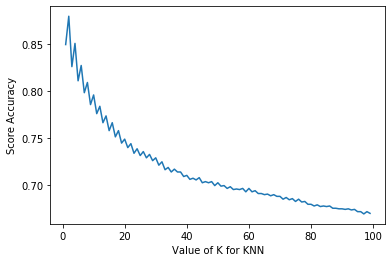

In [14]:
k_range = range(1, 100)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Score Accuracy')

In [8]:
distances = [1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10]
best = 25
# search for an optimal value of p for KNN
# list of scores from k_range
k_scores_p = []

for k in distances:
    print("On", k)
    knn = KNeighborsClassifier(n_neighbors=k, p = k)
    scores = cross_val_score(knn,df_redd,y_red,cv=10,scoring='accuracy')
    k_scores_p.append(scores.mean())
    
print(k_scores_p)

On 1
On 2
On 3
On 4
On 5
On 6
On 7
On 8
On 9
On 10
[0.6797590361445783, 0.8799707922599488, 0.898678349762687, 0.9312449799196788, 0.9216064257028114, 0.9342606790799561, 0.9258342460752098, 0.9384884994523548, 0.9294487039065352, 0.9348703906535232]


Text(0, 0.5, 'Cross-Validated Accuracy')

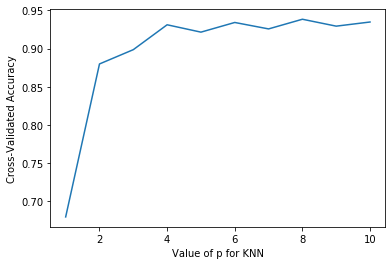

In [9]:
plt.plot(distances, k_scores_p)
plt.xlabel('Value of p for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [13]:
# Updated value after changes
nbrs2= KNeighborsClassifier(n_neighbors=int(25), p=8)
nbrs2.fit(X_traind,y_traind)
nbrs2.score(X_testd,y_testd)

0.908433734939759

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
X_train, X_test, y_train, y_test = train_test_split(df_redd, y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [15]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [18]:
train_rf_predictions = nbrs2.predict(X_train)
train_rf_probs = nbrs2.predict_proba(X_train)[:, 1]

rf_predictions = nbrs2.predict(X_test)
rf_probs = nbrs2.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.98 Train: 0.99
Precision Baseline: 0.7 Test: 0.91 Train: 0.88
Roc Baseline: 0.5 Test: 0.98 Train: 0.99


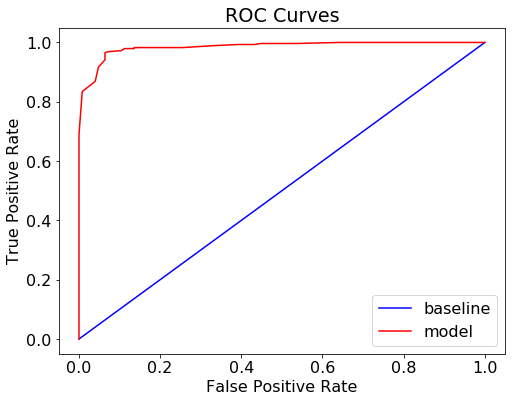

In [21]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[ 98  27]
 [  5 285]]


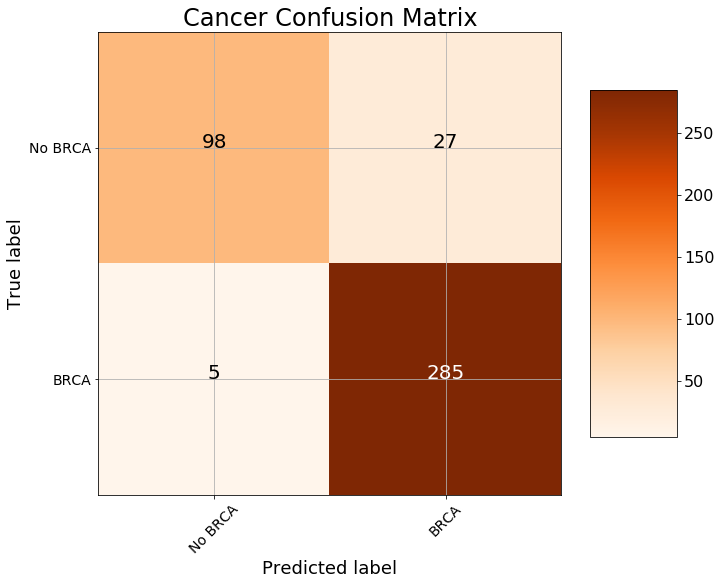

In [22]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')